In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import speechpy

In [43]:
#number of windows = ceil[n_sample/hop_length]
#The sample length is 0.5s = 500ms. So, we can keep window length (n_fft) as 100ms and window increase (hop_length) as 50ms
#librosa sets n_fft and hop_length in terms of number of samples.
#1ms corresponds to 44100/1000 = 44.1 samples 
#100ms = 44.1*100 = 4410
#50ms = 44.1*50  = 2205

Shape of MFCC is = (20, 108)


<AxesSubplot:>

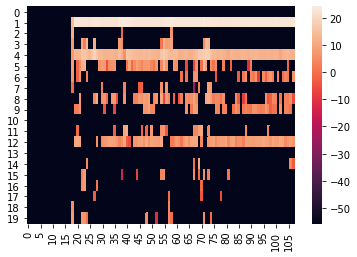

In [42]:
x, sr = librosa.load('tone_data/testing123.wav', sr=44100)
mfcc=librosa.feature.mfcc(x,sr, n_fft=4410, hop_length = 2205)
print("Shape of MFCC is = {}".format(mfcc.shape))

#plot MFCC
fig, ax = plt.subplots()
#Bel: A relative unit of measurement used to express the ratio of power or field quantaties on a log scale
#The baseline pressure value is set to threshold of human hearing, i.e 20uPa
#Decibel is 1/10 of Bel.
#Here, ref=1 because that the highest amplitude we can get from librosa.load. A 0 dB would mean the loudest sound
S_dB = librosa.power_to_db(mfcc, ref=1)
sns.heatmap(S_dB)

Shape of MFCC is = (20, 91)


<AxesSubplot:>

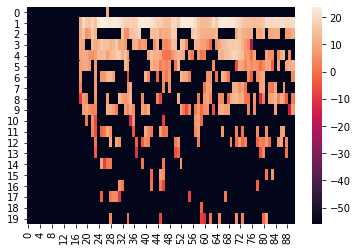

In [39]:
x, sr = librosa.load('tone_data/testing123_loud.wav', sr=44100)
mfcc=librosa.feature.mfcc(x,sr, n_fft=4410, hop_length = 2205)
print("Shape of MFCC is = {}".format(mfcc.shape))

#plot MFCC
fig, ax = plt.subplots()
#Bel: A relative unit of measurement used to express the ratio of power or field quantaties on a log scale
#The baseline pressure value is set to threshold of human hearing, i.e 20uPa
#Decibel is 1/10 of Bel.
#Here, ref=1 because that the highest amplitude we can get from librosa.load. A 0 dB would mean the loudest sound
S_dB = librosa.power_to_db(mfcc, ref=1)
sns.heatmap(S_dB)

In [66]:
#Downsampling experiment
x, sr = librosa.load('tone_data/speech16KHz.wav', sr=16000)

x_resampled_manual = x[0::4]
x_resampled_librosa = librosa.resample(x, sr, 4000)

In [67]:
ipd.Audio(x_resampled_manual, rate=4000) # load a NumPy array

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

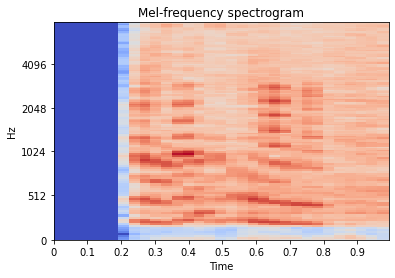

In [70]:
D = np.abs(librosa.stft(x_resampled_manual))**2
S = librosa.feature.melspectrogram(S=D, sr=4000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=1)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
#fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [52]:
ipd.Audio(x_resampled_librosa, rate=4000) # load a NumPy array

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

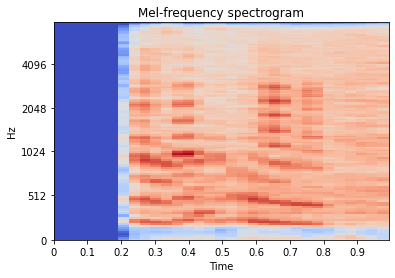

In [71]:
D = np.abs(librosa.stft(x_resampled_librosa))**2
S = librosa.feature.melspectrogram(S=D, sr=4000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=1)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
#fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [39]:
x_resampled_manual.shape

(12304,)

In [40]:
x_resampled_librosa.shape

(12304,)